# Operations Research With Python : A Practical Guide!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install pulp
!pip install ortools
from warnings import filterwarnings
filterwarnings("ignore")

**Hello everyone!**

**I will show you how to use Python to solve some optimization and operations research problems. I took an operations research course this semester and I was fascinated by the applications and techniques of this field. I decided to use Python as a tool to implement and test some of the methods we learned in the course. I hope you will find this notebook useful and interesting. Feel free to leave your comments and feedback below.**

# What are some popular Python libraries for operations research?

**Pyomo**: A Python modeling language for mathematical optimization.

**PuLP**: A Python linear programming solver.

**CPLEX**: A commercial optimization solver.

**GUROBI**: A commercial optimization solver.

**FICO Xpress:** A commercial optimization solver.

**Python for OR**: A collection of Python libraries for operations research.

**Google OR-Tools** : portable software suite for solving combinatorial optimization problems

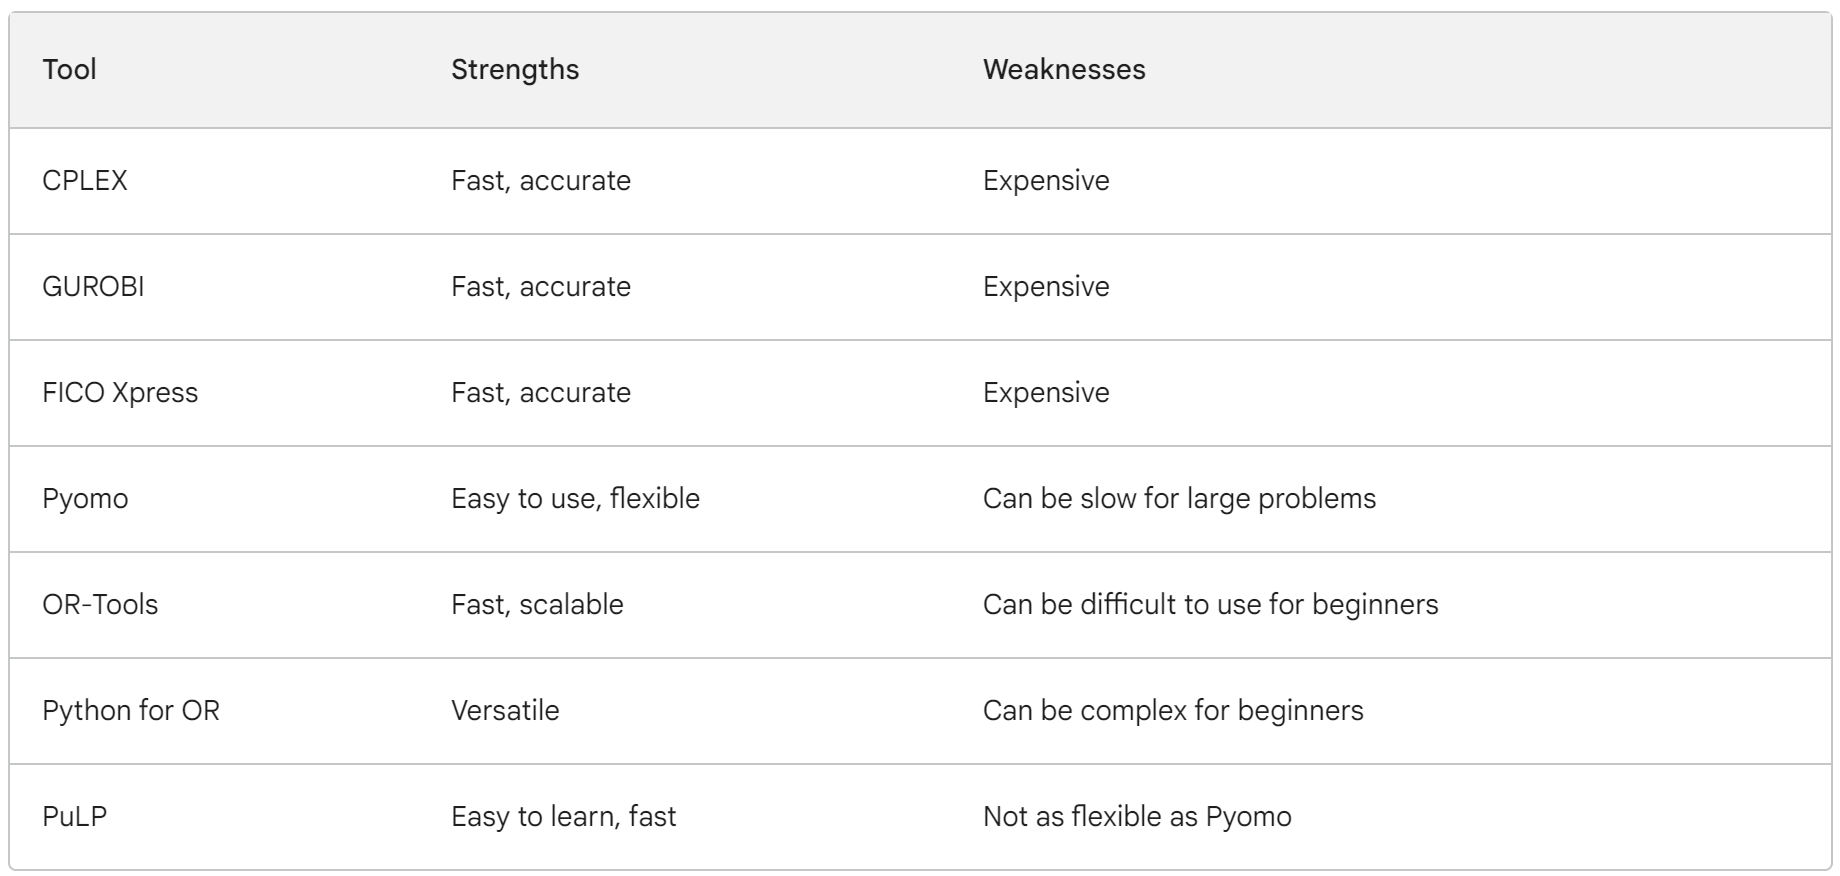

# Example 1

**Now, let's go to the first example. This is a simple problem, but it will help us to illustrate the basic concepts**

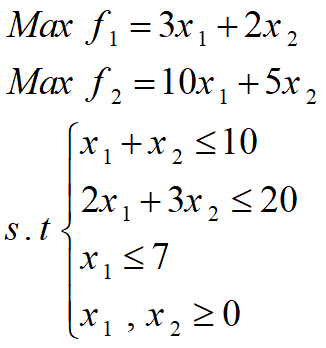

In [2]:
# Import PuLP module
import pulp

# Create a problem instance
prob = pulp.LpProblem("Multi-objective", pulp.LpMaximize)

# Define decision variables
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)


# Define constraints
prob += x1 +x2 <= 10 # Constraint 1
prob += 2*x1 + 3*x2 <= 20 # Constraint 2
prob += x1<=7 # Constraint 3

# Define first objective function
obj1 = 3*x1+2*x2

# Define second objective function
obj2 = 10*x1+5*x2

# Add first objective function to the problem
prob += obj1 + obj2

# Solve the problem using CBC solver
prob.solve()

# Print the optimal solution
print("Status:", pulp.LpStatus[prob.status])
print("Objective 1:", pulp.value(obj1))
print("Objective 2:", pulp.value(obj2))
print("x1:", pulp.value(x1))
print("x2:", pulp.value(x2))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.7/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/f9dd0379e3f34189b7a2069a05303a81-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/f9dd0379e3f34189b7a2069a05303a81-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 16 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 3 rows, 2 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-1) rows, 2 (0) columns and 4 (-1) elements
0  Obj -0 Dual inf 19.999998 (2)
1  Obj 105
Optimal - objective value 105
After Postsolve, objective 105, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 105 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

Status: Optimal
Objective

# Example  2

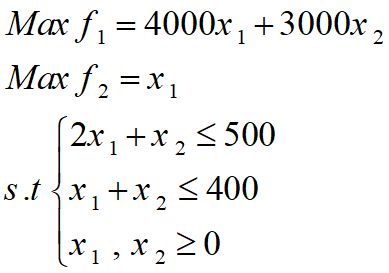

In [3]:
# Create a problem instance
prob = pulp.LpProblem("Multi-objective", pulp.LpMaximize)

# Define decision variables
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)



# Define constraints
prob += x1 +x2 <= 400 # Constraint 1
prob += 2*x1 + x2 <= 500 # Constraint 2
#prob += x1<=7 # Constraint 3
prob += x1>=0 # Constraint 4
prob += x2>=0 # Constraint 5

# Define first objective function
obj1 = 4000*x1+3000*x2

# Define second objective function
obj2 = x1

# Add first objective function to the problem
prob += obj1 + obj2

# Solve the problem using CBC solver
prob.solve()

# Print the optimal solution
print("Status:", pulp.LpStatus[prob.status])
print("Objective 1:", pulp.value(obj1))
print("Objective 2:", pulp.value(obj2))
print("x1:", pulp.value(x1))
print("x2:", pulp.value(x2))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.7/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/f376f6f08d184e01bc4a370785da83eb-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/f376f6f08d184e01bc4a370785da83eb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-2) rows, 2 (0) columns and 4 (-2) elements
0  Obj -0 Dual inf 7001 (2)
2  Obj 1300100
Optimal - objective value 1300100
After Postsolve, objective 1300100, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1300100 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Optima

# Example 3

**how to maximize the profit of producing two types of chairs, A and B, in a furniture factory?**

The profit per unit of chair A is 50 dollars, and the profit per unit of chair B is 40 dollars. The factory has a limited amount of wood, labor, and machine time. Each unit of chair A requires 4 units of wood, 2 hours of labor, and 1 hour of machine time. Each unit of chair B requires 3 units of wood, 1 hour of labor, and 2 hours of machine time. The factory has 240 units of wood, 100 hours of labor, and 80 hours of machine time available per day

**Objective function:**

Max P=50A+40B

S.t:

**Wood**: 4A+3B≤240

**Labor**: 2A+B≤100

**Machine**: A+2B≤80

A≥0
 and B≥0

In [4]:
# Import ortools
from ortools.linear_solver import pywraplp

# Create a solver instance
solver = pywraplp.Solver.CreateSolver('GLOP')

# Create the decision variables
A = solver.IntVar(0.0, solver.infinity(), 'A') # Number of units of chair A
B = solver.IntVar(0.0, solver.infinity(), 'B') # Number of units of chair B

# Add the objective function
objective = solver.Objective()
objective.SetCoefficient(A, 50) # Profit per unit of chair A
objective.SetCoefficient(B, 40) # Profit per unit of chair B
objective.SetMaximization() # Maximize the total profit

# Add the constraints
constraint1 = solver.Constraint(-solver.infinity(), 240) # Wood
constraint1.SetCoefficient(A, 4) # Wood per unit of chair A
constraint1.SetCoefficient(B, 3) # Wood per unit of chair B

constraint2 = solver.Constraint(-solver.infinity(), 100) # Labor
constraint2.SetCoefficient(A, 2) # Labor per unit of chair A
constraint2.SetCoefficient(B, 1) # Labor per unit of chair B

constraint3 = solver.Constraint(-solver.infinity(), 80) # Machine
constraint3.SetCoefficient(A, 1) # Machine per unit of chair A
constraint3.SetCoefficient(B, 2) # Machine per unit of chair B

# Solve the problem using the solver
status = solver.Solve()

# Print the optimal solution
if status == pywraplp.Solver.OPTIMAL:
    print('Status:', 'Optimal')
    print('Optimal Solution:')
    print('A =', A.solution_value())
    print('B =', B.solution_value())
    print('Total Profit =', objective.Value())
else:
    print('Status:', 'Not optimal')

Status: Optimal
Optimal Solution:
A = 39.99999999999999
B = 19.999999999999996
Total Profit = 2799.9999999999995


# Example 4 

You have a 100-hectare land and want to plant three crops: wheat, corn, and soybeans. Each crop has a different selling price per ton, and the amount of production depends on the weather scenario: good, average, or bad.

 The probability of each scenario occurring is known.
 
 Your objective is to maximize your expected profit from selling the products while also satisfying some constraints on the amount of land used for each crop.

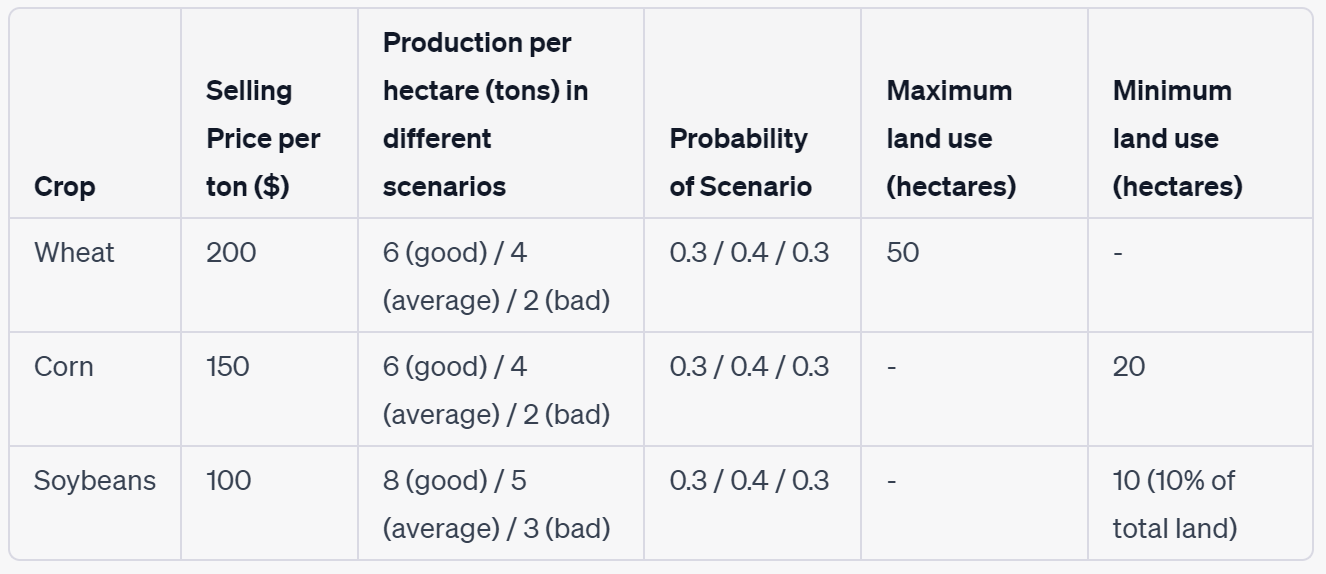

In [5]:
# Import PuLP library for linear programming
from pulp import *

# Define the constants: prices, productions and probabilities for each product and scenario
PRICES = {"wheat": 200, "corn": 150, "soybeans": 100}
PRODUCTIONS = {"wheat": {"good": 6, "average": 4, "bad": 2},
                                 "corn": {"good": 6, "average": 4, "bad": 2},
                                 "soybeans": {"good": 8, "average": 5, "bad": 3}}
                                 
PROBABILITIES = {"good": 0.3, "average": 0.4, "bad": 0.3}

# Define the decision variables: areas for each product
areas = LpVariable.dicts("area", PRICES.keys(), lowBound=0)

# Define the problem: maximize expected profit
prob = LpProblem("Land Use Optimization", LpMaximize)

# Define the objective function: expected profit = sum of (price * production * probability) for each product and scenario
prob += lpSum([PRICES[product] * PRODUCTIONS[product][scenario] * PROBABILITIES[scenario] * areas[product]
               for product in PRICES.keys()
               for scenario in PROBABILITIES.keys()])

# Define the constraints: total area <= 100, area for wheat <= 50, area for soybeans >= 10% of total area
prob += lpSum(areas.values()) <= 100
prob += areas["wheat"] <= 50
prob += areas["soybeans"] >= 0.1 * lpSum(areas.values())

# Solve the problem using PuLP's default solver
prob.solve()

# Print the optimal solution and the optimal value
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Expected Profit =", value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.7/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/dd94177420aa4aaca2264a438d6c49f0-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/dd94177420aa4aaca2264a438d6c49f0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 19 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 3 rows, 3 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-1) rows, 3 (0) columns and 6 (-1) elements
0  Obj -0 Primal inf 99.999999 (1) Dual inf 1576.6667 (3)
2  Obj 69300
Optimal - objective value 69300
After Postsolve, objective 69300, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 69300 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

# Example 5
Here's an example of dynamic programming in Python using the knapsack problem. The goal of the problem is to maximize the total value of items that can fit into a knapsack with a weight capacity. The code takes in a list of item values, a list of item weights, and the knapsack capacity, and returns the maximum total value that can be carried in the knapsack based on those inputs."

In [6]:
#top-down approach
def knapsack_memo(values, weights, capacity):
  n = len(values)
  memo = [[-1 for _ in range(capacity + 1)] for _ in range(n + 1)]
  
  def memo_helper(i, j):
    if memo[i][j] != -1:
      return memo[i][j]
    if i == 0 or j == 0:
      memo[i][j] = 0
    elif weights[i-1] > j:
      memo[i][j] = memo_helper(i-1, j)
    else:
      memo[i][j] = max(values[i-1] + memo_helper(i-1, j-weights[i-1]), memo_helper(i-1, j))
    return memo[i][j]
    
  return memo_helper(n, capacity)

values = [2, 1, 10, 2, 4]
weights = [2, 1, 4, 2, 12]
capacity = 15
print(knapsack_memo(values, weights, capacity))

15


In [7]:
#bottom-up approach
def knapsack(values, weights, capacity):
  n = len(values)
  dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
  for i in range(1, n + 1):
    for j in range(1, capacity + 1):
      if weights[i - 1] <= j:
        dp[i][j] = max(values[i - 1] + dp[i - 1][j - weights[i - 1]], dp[i - 1][j])
      else:
        dp[i][j] = dp[i - 1][j]
  return dp[n][capacity]

values = [2, 1, 10 , 2  , 4 ]
weights = [2, 1, 4 , 2  , 12] 
capacity = 15
print(knapsack(values, weights, capacity))

15
